## Differential Event Rate in terms of the momentum transfer in each event

Momentum accommodation coefficient alpha?

https://arxiv.org/abs/2303.09922


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.stats import expon

### Sensor Parameters

In [25]:
density = 1850 # kg/m^3
diameter = 3e-6 # m
volume = (4/3) * np.pi * (diameter/2)**3
sensor_mass = density * volume # in kg
sensor_surface_area = 4 * np.pi * (diameter/2)**2
k_B = 1.38e-23 # J / K
T = 293 # K

print("Sensor Mass =", sensor_mass, "kg")

Sensor Mass = 2.6153758841135025e-14 kg


### Functions

In [60]:
def boltzmann_dist(v, mass_gas):
    return 4*np.pi*v**2 * (mass_gas/(2*np.pi*k_B*T))**(3/2) * np.exp(-mass_gas*v**2/(2*k_B*T))

def z(x):
    return np.pi * x * (1 - 2/(x**2)) *erf(x/2)*np.exp(-x**2/8) + 2*np.exp(-3*x**2/8)

def event_rate(p, mass_gas, v_rms, n_gas, alpha):
    v = p / (2 * mass_gas)
    x = p / (mass_gas * v_rms)
    return n_gas * sensor_surface_area * p * boltzmann_dist(v, mass_gas) * ((1-alpha) + alpha * z(x)) / (4 * mass_gas**2)

def event_rate_approx(p):
    return z * ((1-alpha) + alpha * z)

In [61]:
def momentum_spectrum(mass_u, P):

    mass_gas = mass_u * 1.661e-27 # kg
    e = 1.6022e-19
    c = 2.9979e8 # m / s
    p = np.sqrt(mass_gas * T * k_B) # kg m / s
    p_kev = p / e * c / 1000 # keV / c
    #print("p =", round(p, 23), "kg*m/s =", round(p_kev, 1), "keV/c")

    n_gas = P / (k_B * T)
    v_rms = np.sqrt(k_B * T / mass_gas)
    alpha = 0.2

    # Plot

    # Correct Joule Units
    p = np.linspace(1, 600, 1000) * 1000 * e / c
    rate = event_rate(p, mass_gas, v_rms, n_gas, alpha)

    # Convert to KeV Units
    p = p * c / (1000 * e)
    rate = rate * 1000 * e / c

    max_p = p[np.argmax(rate)]

    return p, rate, max_p


xenon peak Event Rate = 179.08 Hz/keV
krypton peak Event Rate = 143.11 Hz/keV
radon peak Event Rate = 233.05 Hz/keV
sf6 peak Event Rate = 189.27 Hz/keV


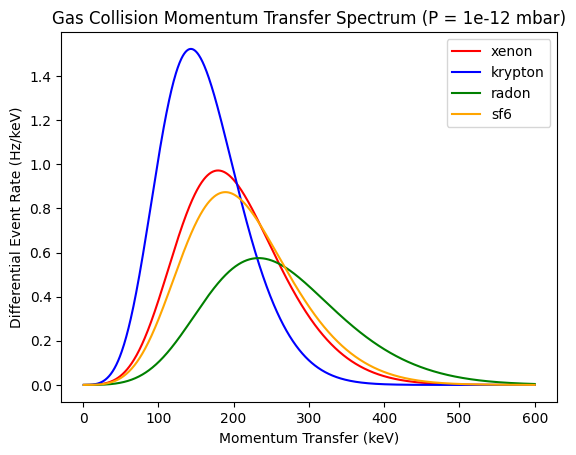

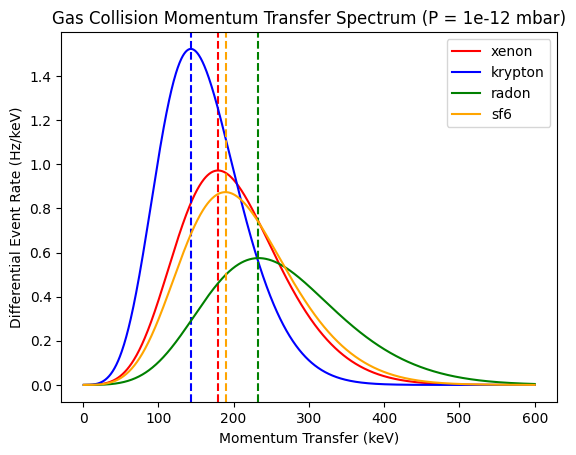

In [98]:
P = 1e-10

xenon = momentum_spectrum(131.3, P)
krypton = momentum_spectrum(83.8, P)
radon = momentum_spectrum(222.017, P)
sf6 = momentum_spectrum(146.05, P)
h2 = momentum_spectrum(2.016, P)
n2 = momentum_spectrum(28.014, P)

colors = ['red', 'blue', 'green', 'orange', 'pink', 'magenta']
gases = ['xenon', 'krypton', 'radon', 'sf6']

for i, gas in enumerate([xenon, krypton, radon, sf6]):
    p, rate, max_p = gas
    plt.plot(p, rate, color=colors[i], label=gases[i])
    plt.xlabel("Momentum Transfer (keV)")
    plt.ylabel("Differential Event Rate (Hz/keV)")
    plt.title("Gas Collision Momentum Transfer Spectrum (P = 1e-12 mbar)")
    plt.legend()
    print(gases[i], "peak Event Rate =", round(max_p, 2), "Hz/keV")

plt.show()

for i, gas in enumerate([xenon, krypton, radon, sf6]):
    p, rate, max_p = gas
    plt.plot(p, rate, color=colors[i], label=gases[i])
    plt.axvline(x=max_p, color=colors[i], linestyle='--')
    plt.xlabel("Momentum Transfer (keV)")
    plt.ylabel("Differential Event Rate (Hz/keV)")
    plt.title("Gas Collision Momentum Transfer Spectrum (P = 1e-12 mbar)")
    plt.legend()

plt.show()

### H2 and N2 Sanity Check

Xenon Peak Event Rate = 179.08 Hz/keV
Xenon Peak Event Rate = 21.99 Hz/keV
Xenon Peak Event Rate = 82.55 Hz/keV


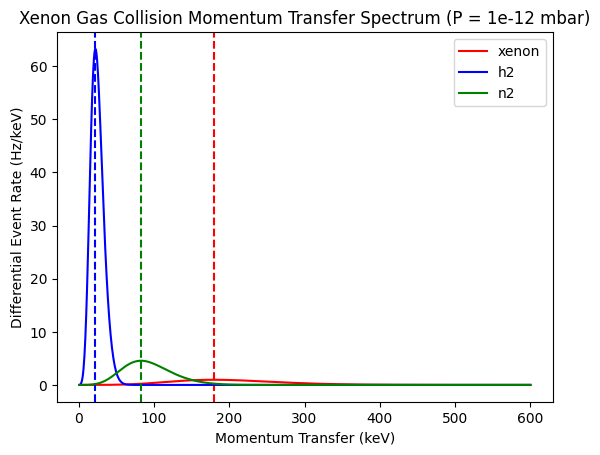

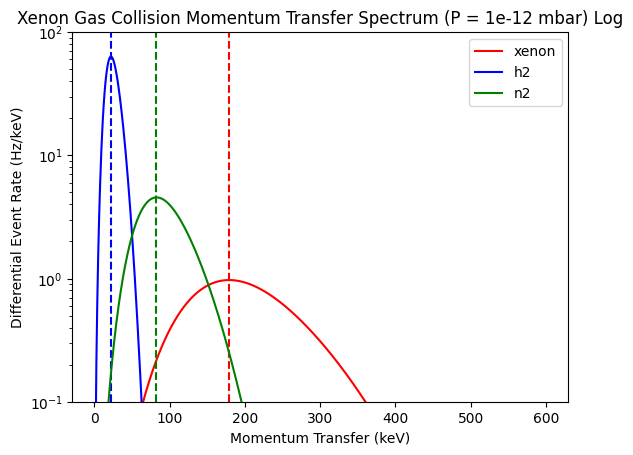

In [93]:
P = 1e-10

xenon = momentum_spectrum(131.3, P)
krypton = momentum_spectrum(83.8, P)
radon = momentum_spectrum(222.017, P)
sf6 = momentum_spectrum(146.05, P)
h2 = momentum_spectrum(2.016, P)
n2 = momentum_spectrum(28.014, P)

colors = ['red', 'blue', 'green', 'orange', 'pink', 'magenta']
gases = ['xenon', 'h2', 'n2']

for i, gas in enumerate([xenon, h2, n2]):
    p, rate, max_p = gas
    plt.plot(p, rate, color=colors[i], label=gases[i])
    plt.axvline(x=max_p, color=colors[i], linestyle='--')
    plt.xlabel("Momentum Transfer (keV)")
    plt.ylabel("Differential Event Rate (Hz/keV)")
    plt.title("Xenon Gas Collision Momentum Transfer Spectrum (P = 1e-12 mbar)")
    plt.legend()
    print("Xenon Peak Event Rate =", round(max_p, 2), "Hz/keV")

plt.show()

for i, gas in enumerate([xenon, h2, n2]):
    p, rate, max_p = gas
    plt.plot(p, rate, color=colors[i], label=gases[i])
    plt.axvline(x=max_p, color=colors[i], linestyle='--')
    plt.xlabel("Momentum Transfer (keV)")
    plt.ylabel("Differential Event Rate (Hz/keV)")
    plt.title("Xenon Gas Collision Momentum Transfer Spectrum (P = 1e-12 mbar) Log")
    plt.legend()

plt.yscale('log')
plt.ylim(10e-2, 10e1)
plt.show()